In [796]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### Step 1: Prepare the Workspace

In [797]:
Atrain1 = pd.read_csv("baby-weights-dataset2.csv")
#this gives information about babies born, together with birth weight
Atrain1.describe()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
count,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,...,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000
mean,52700.500000,1.485671,1.303817,30.174477,30.283037,12.436943,27.736312,12.926893,13.256489,2.378462,...,0.013767,0.050039,0.003807,0.003738,0.005680,0.008856,0.002189,0.003777,0.003442,7.258066
std,29271.802985,0.500349,0.459907,6.775576,13.615401,3.728901,5.957369,2.926569,2.932693,1.490272,...,0.116524,0.218027,0.061581,0.061022,0.075155,0.093689,0.046739,0.061342,0.058566,1.329461
min,2001.000000,1.000000,1.000000,14.000000,0.000000,0.000000,11.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187500
25%,27350.750000,1.000000,1.000000,25.000000,21.000000,10.000000,23.000000,12.000000,12.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.625000
50%,52700.500000,1.000000,1.000000,30.000000,30.000000,12.000000,28.000000,12.000000,13.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.375000
75%,78050.250000,2.000000,2.000000,35.000000,39.000000,15.000000,32.000000,16.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.062500
max,103400.000000,9.000000,2.000000,74.000000,98.000000,49.000000,53.000000,17.000000,17.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.062500


### Step 2: Data Exploration

In [798]:
print("BWEIGHT Variable")
print("Mean:",Atrain1['BWEIGHT'].mean())
print("stdev ",np.std(Atrain1['BWEIGHT']))
print("Min:", Atrain1['BWEIGHT'].min())
print("Max:",Atrain1['BWEIGHT'].max())
print("25% percentile: ",np.percentile(Atrain1['BWEIGHT'], 25))
print("Median:",np.percentile(Atrain1['BWEIGHT'], 50))
print("75% Percentile: ",np.percentile(Atrain1['BWEIGHT'], 75))

BWEIGHT Variable
Mean: 7.2580658284023665
stdev  1.3294541253578183
Min: 0.1875
Max: 13.0625
25% percentile:  6.625
Median: 7.375
75% Percentile:  8.0625


In [799]:
#Computing the Skewness and the Kurtosis of the Birth Weight variable
print("Skewness: %f" % Atrain1['BWEIGHT'].skew())
print("Kurtosis: %f" % Atrain1['BWEIGHT'].kurt())

Skewness: -0.936593
Kurtosis: 2.868780


In [800]:
#Identifying the categorical values from the training dataset
quantitative = [f for f in Atrain1.columns if Atrain1.dtypes[f] != 'object']
quantitative.remove('BWEIGHT')
quantitative.remove('ID')
qualitative = [f for f in Atrain1.columns if Atrain1.dtypes[f] == 'object']
print('quantitative :',quantitative)
print('qualitative :',qualitative)

quantitative : ['SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'RACEMOM', 'RACEDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL', 'RHSEN', 'UTERINE']
qualitative : ['HISPMOM', 'HISPDAD']


In [801]:
#Replace the missing qualitative variables
for c in qualitative:
    Atrain1[c] = Atrain1[c].astype('category')
    print(Atrain1[c])
    if Atrain1[c].isnull().any():
        Atrain1[c] = Atrain1[c].cat.add_categories(['MISSING'])
        Atrain1[c] = Atrain1[c].fillna('MISSING')
        print(Atrain1[c])

0         M
1         N
2         N
3         N
4         N
5         N
6         M
7         M
8         N
9         N
10        N
11        N
12        N
13        S
14        N
15        S
16        N
17        N
18        N
19        N
20        M
21        N
22        N
23        N
24        N
25        N
26        N
27        N
28        N
29        N
         ..
101370    N
101371    N
101372    N
101373    N
101374    M
101375    M
101376    N
101377    N
101378    M
101379    P
101380    N
101381    N
101382    N
101383    N
101384    N
101385    N
101386    N
101387    N
101388    P
101389    N
101390    N
101391    S
101392    S
101393    N
101394    M
101395    M
101396    N
101397    N
101398    N
101399    N
Name: HISPMOM, Length: 101400, dtype: category
Categories (7, object): [C, M, N, O, P, S, U]
0         M
1         N
2         N
3         N
4         N
5         N
6         M
7         N
8         N
9         N
10        N
11        N
12        N
13        S
14     

In [802]:
#Encode the qualitative variable as HISPMOM_E and HISPDAD_E
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'BWEIGHT']].groupby(feature).mean()['BWEIGHT']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
qual_encoded = []
for q in qualitative:  
    encode(Atrain1, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)
type(qualitative)

['HISPMOM_E', 'HISPDAD_E']


list

In [803]:
Feature = quantitative + qual_encoded
Upd_Dset = Atrain1[Feature]

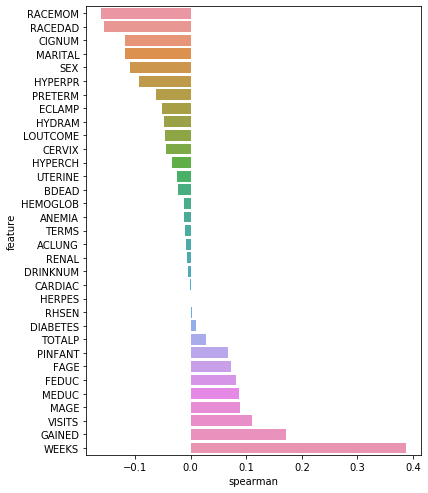

In [804]:
#Spearman's rank correlation
def spearman(frame, Feature):
    spr = pd.DataFrame()
    spr['feature'] = Feature
    spr['spearman'] = [frame[f].corr(frame['BWEIGHT'], 'spearman') for f in Feature]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(Feature)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    return 
Feature = quantitative 
spearman(Atrain1, Feature)

In [805]:
Correlated_Feature = ["WEEKS","GAINED","RACEMOM","RACEDAD","VISITS","MAGE"]
Upd_Dset = Upd_Dset[Correlated_Feature]

### Step 3: Train and Test dataset

In [806]:
#Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
ATrain, ATest = train_test_split(Upd_Dset, test_size=0.2, random_state=12345)
BTrain, BTest = train_test_split(Atrain1[["BWEIGHT"]], test_size=0.2, random_state=12345)
print(BTest.head(10))
ATrain.shape


       BWEIGHT
1072    8.8125
65946   6.0000
70393   6.7500
2599   10.4375
67617   7.3750
32787   6.0000
10894   7.4375
95293   7.1875
23073   8.3125
42819   7.6250


(81120, 6)

In [807]:
#Applying a normalization technique to Training and Testing dataset
stdscaler = StandardScaler()
ATrain_X = stdscaler.fit_transform(ATrain)
print(ATrain_X)


stdscaler = StandardScaler()
ATest_X = stdscaler.fit_transform(ATest)
ATest_X.shape

[[ 0.10582437 -0.6065972  -0.33815318 -0.35320679  3.09653639  1.89333778]
 [ 0.90245325 -0.38646079 -0.33815318 -0.35320679 -0.65010304  0.54925152]
 [ 0.10582437 -0.09294558 -0.33815318 -0.35320679 -0.11486883  0.04521917]
 ...
 [ 1.69908213 -0.01956678 -0.33815318 -0.35320679  2.02606798 -0.29080239]
 [ 0.10582437 -0.38646079 -0.33815318 -0.35320679 -0.11486883 -0.79483474]
 [-1.48743339  0.86097886 -0.33815318 -0.35320679 -0.11486883  1.725327  ]]


(20280, 6)

### Step 4: Model Creation using Linear Regression

In [808]:
ATrain_X = np.c_[np.ones(ATrain_X.shape[0]), ATrain_X]

In [809]:
np.random.seed(15) 
theta = np.random.rand(7, 1) 
m =  BTrain.size
def linear_reg(x, y, theta):
    prev_costs = []
    prev_thetas = [theta]
    for i in range(1000):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        prev_costs.append(cost)
        theta = theta - (0.01 * (1/m) * np.dot(x.T, error))
        prev_thetas.append(theta)
    return prev_thetas, past_costs
prev_thetas, prev_costs = linear_reg(ATrain_X, BTrain, theta)
theta = prev_thetas[-1]

### Step 5: Birth Weight Prediction

In [810]:
ATest_X = np.c_[np.ones(ATest_X.shape[0]), ATest_X] 
Bpredict = np.dot(ATest_X, theta)
print(Bpredict)
BTest.ndim

[[7.27866234]
 [7.09491933]
 [7.39553163]
 ...
 [8.74971844]
 [7.14400035]
 [7.71908532]]


2

In [811]:
def error(actual, predicted):
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))
print(error(BTest, Bpredict))

BWEIGHT    1.070844
dtype: float64


In [812]:
Weight1 = error(BTest, Bpredict)

In [813]:
print('Mean Absolute Error:', metrics.mean_absolute_error(BTest, Bpredict))  
print('Mean Squared Error:', metrics.mean_squared_error(BTest, Bpredict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(BTest, Bpredict)))

Mean Absolute Error: 0.8380528960447409
Mean Squared Error: 1.1467069837601163
Root Mean Squared Error: 1.0708440520263052


In [814]:
#Running this multiple times and calculate the Average RMSE 
np.random.seed(5)
theta = np.random.rand(7, 1) 
m =  BTrain.size
def linear_reg(x, y, theta):
    prev_costs = []
    prev_thetas = [theta]
    for i in range(1000):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        prev_costs.append(cost)
        theta = theta - (0.01 * (1/m) * np.dot(x.T, error))
        prev_thetas.append(theta)
    return prev_thetas, past_costs
prev_thetas, prev_costs = linear_reg(ATrain_X, BTrain, theta)
theta = prev_thetas[-1]
Bpredict = np.dot(ATest_X, theta)
Weight2 = error(BTest, Bpredict)
print(Weight2)

BWEIGHT    1.070855
dtype: float64


In [815]:
np.random.seed(8) 
theta = np.random.rand(7, 1) 
m =  BTrain.size
def linear_reg(x, y, theta):
    prev_costs = []
    prev_thetas = [theta]
    for i in range(1000):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        prev_costs.append(cost)
        theta = theta - (0.01 * (1/m) * np.dot(x.T, error))
        prev_thetas.append(theta)
    return prev_thetas, past_costs
prev_thetas, prev_costs = linear_reg(ATrain_X, BTrain, theta)
theta = prev_thetas[-1]
Bpredict = np.dot(ATest_X, theta)
Weight3 = error(BTest, Bpredict)
print(Weight3)

BWEIGHT    1.070838
dtype: float64


In [816]:
np.random.seed(18) 
theta = np.random.rand(7, 1) 
m =  BTrain.size
def linear_reg(x, y, theta):
    prev_costs = []
    prev_thetas = [theta]
    for i in range(1000):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        prev_costs.append(cost)
        theta = theta - (0.01 * (1/m) * np.dot(x.T, error))
        prev_thetas.append(theta)
    return prev_thetas, past_costs
prev_thetas, prev_costs = linear_reg(ATrain_X, BTrain, theta)
theta = prev_thetas[-1]
Bpredict = np.dot(ATest_X, theta)
Weight4 = error(BTest, Bpredict)
print(Weight4)

BWEIGHT    1.071185
dtype: float64


In [817]:
np.random.seed(16) 
theta = np.random.rand(7, 1) 
m =  BTrain.size
def linear_reg(x, y, theta):
    prev_costs = []
    prev_thetas = [theta]
    for i in range(1000):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        prev_costs.append(cost)
        theta = theta - (0.01 * (1/m) * np.dot(x.T, error))
        prev_thetas.append(theta)
    return prev_thetas, past_costs
prev_thetas, prev_costs = linear_reg(ATrain_X, BTrain, theta)
theta = prev_thetas[-1]
Bpredict = np.dot(ATest_X, theta)
Weight5 = error(BTest, Bpredict)
print(Weight5)

BWEIGHT    1.070965
dtype: float64


In [818]:
AverageRMSE = (Weight1 + Weight2  + Weight3 + Weight4 + Weight5 )/ 5
StdDev = np.std([Weight1, Weight2 , Weight3 , Weight4 , Weight5])/5
RMSE = AverageRMSE +- StdDev
print('AverageRMSE :',AverageRMSE)
print('StdDev :',StdDev)
print('RMSE :',RMSE)

AverageRMSE : BWEIGHT    1.070937
dtype: float64
StdDev : 2.645803115690209e-05
RMSE : BWEIGHT    1.070911
dtype: float64
